### Import Library

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import splitfolders
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator

### Read Data

In [8]:
train_path = r'./../PAKB/data/train'
test_path = r'./../PAKB/data/test'
val_path = r'./../PAKB/data/val' 

### Augmented Data

In [9]:
IMG_PATH='data'
train_datagen = ImageDataGenerator(
    IMG_PATH,
    rescale=1./255, 
    rotation_range = 0.45,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    IMG_PATH,
    rescale=1./255, 
    rotation_range = 0.45,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
    
)


val_datagen = ImageDataGenerator(
    IMG_PATH,
    rescale=1./255, 
    rotation_range = 0.45,
    width_shift_range= 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
    
)

### Load Data

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    seed = 1000,
    target_size = (40,40), #Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    seed = 1000,
    target_size = (40,40),#Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)



val_generator = val_datagen.flow_from_directory(
   val_path,
    seed = 1000,
    target_size = (40,40), #Reshape
    shuffle=True,
    batch_size = 128,
    class_mode ='binary'
    
)

Found 10675 images belonging to 2 classes.
Found 1684 images belonging to 2 classes.
Found 4141 images belonging to 2 classes.


In [11]:
img, label = train_generator.next()


D:\ANACONDA\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


### Visualisasi Data

(128, 40, 40, 3)


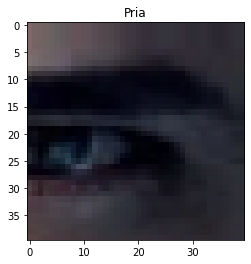

(128, 40, 40, 3)


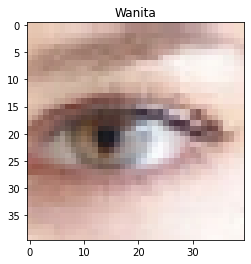

(128, 40, 40, 3)


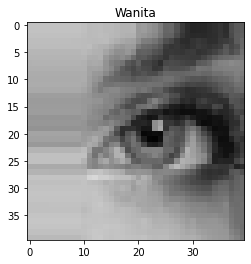

(128, 40, 40, 3)


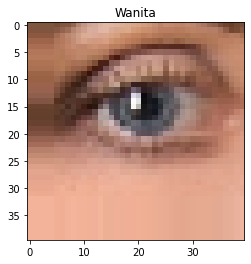

(128, 40, 40, 3)


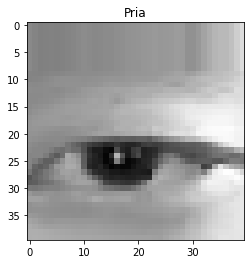

In [12]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Wanita")
    else:
        plt.title("Pria")
    plt.show()

### Modelling

In [13]:
image,label = train_generator.next()

In [14]:
label_name= ['female','male']

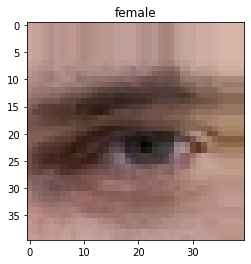

In [15]:
data = 0 #karena pakai split folders
plt.imshow(image[data])
plt.title(label_name[data])
plt.show()

### Arsitektur Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=[40,40,3]),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='sigmoid'), #tambahkan layer biar akurasinya naik wkwk
    tf.keras.layers.Dense(1, activation='sigmoid') #2 class wanita pria
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)               (None, 32)                4

### Compile

In [18]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
metrics=['accuracy'])

### Modelling Epoch

In [19]:
hasil = model.fit(train_generator, epochs=40, validation_data=val_generator) #overfitting itu saat nilai akurasi dengan val akurasinya nilainya beda jauh

Epoch 1/40
84/84 [==============================] - 173s 2s/step - loss: 0.6969 - accuracy: 0.5203 - val_loss: 0.6922 - val_accuracy: 0.5496
Epoch 2/40
84/84 [==============================] - 50s 598ms/step - loss: 0.6761 - accuracy: 0.5749 - val_loss: 0.6783 - val_accuracy: 0.5581
Epoch 3/40
84/84 [==============================] - 58s 686ms/step - loss: 0.6605 - accuracy: 0.6054 - val_loss: 0.6481 - val_accuracy: 0.6484
Epoch 4/40
84/84 [==============================] - 64s 756ms/step - loss: 0.6443 - accuracy: 0.6319 - val_loss: 0.6447 - val_accuracy: 0.6383
Epoch 5/40
84/84 [==============================] - 64s 764ms/step - loss: 0.6235 - accuracy: 0.6572 - val_loss: 0.6160 - val_accuracy: 0.6626
Epoch 6/40
84/84 [==============================] - 52s 624ms/step - loss: 0.6091 - accuracy: 0.6742 - val_loss: 0.6100 - val_accuracy: 0.6556
Epoch 7/40
84/84 [==============================] - 48s 572ms/step - loss: 0.5940 - accuracy: 0.6895 - val_loss: 0.5759 - val_accuracy: 0.7131
E

In [25]:
y_acc_train = hasil.history['accuracy']
y_acc_val = hasil.history['val_accuracy']
y_loss_train = hasil.history['loss']
y_loss_val = hasil.history['val_loss']
x = range(len(y_acc_train))

Text(0, 0.5, 'loss')

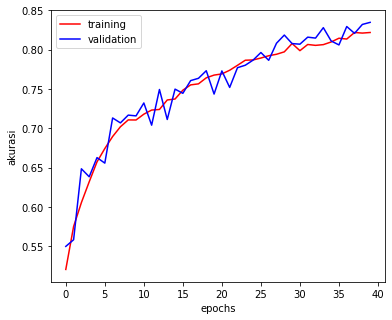

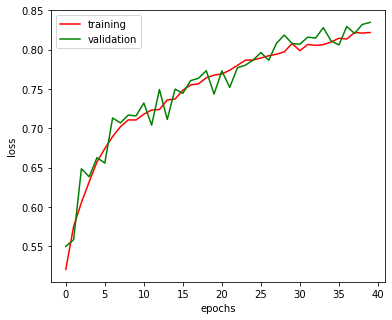

In [26]:
plt.figure(1, figsize=(6,5))
plt.plot(x,y_acc_train, c='r', label =  'training')
plt.plot(x,y_acc_val, c='b', label =  'validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('akurasi')

plt.figure(2, figsize=(6,5))
plt.plot(x,y_acc_train, c='r', label =  'training')
plt.plot(x,y_acc_val, c='g', label =  'validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

### Validation

In [27]:
model.evaluate(test_generator)

14/14 [==============================] - 5s 355ms/step - loss: 0.3845 - accuracy: 0.8302


[0.3845491111278534, 0.8301662802696228]

### Testing Data

In [28]:
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=[40,40])
    img_array = keras.preprocessing.image.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = predictions[0]
    print("This image is %.2f percent female and %.2f percent male." % (100 * (1 - score), 100 * score))
    plt.imshow(img);

1/1 [==============================] - 0s 81ms/step
This image is 0.56 percent female and 99.44 percent male.


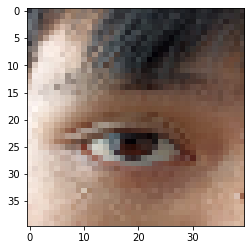

In [31]:
predict_image("mata alan.jpeg") 

1/1 [==============================] - 0s 44ms/step
This image is 90.40 percent female and 9.60 percent male.


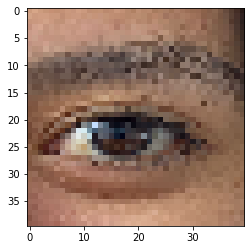

In [32]:
predict_image("mata cantika.jpeg")

1/1 [==============================] - 0s 44ms/step
This image is 0.31 percent female and 99.69 percent male.


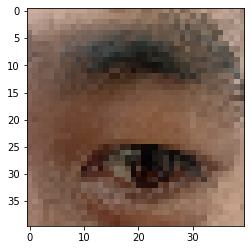

In [34]:
predict_image("mata ghozali.jpeg")